In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv("train.tsv", sep="\t")

In [4]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
df.Sentiment.unique()

array([1, 2, 3, 4, 0], dtype=int64)

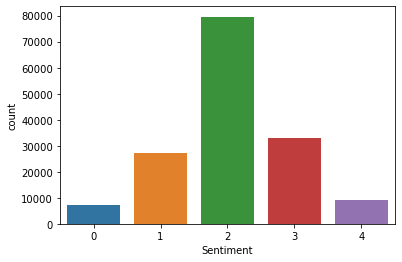

In [6]:
sns.countplot(df.Sentiment)

In [7]:
df["Sentiment"].replace([0,1,3,4], ["negative", "negative", "positive", "positive"], inplace = True)

In [8]:
df = df[df.Sentiment != 2]

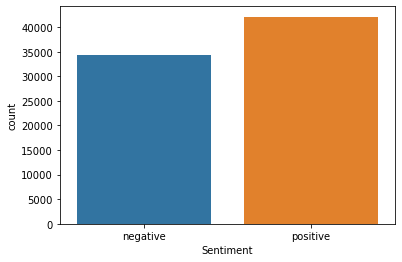

In [9]:
sns.countplot(df.Sentiment)

In [10]:
df.drop(["PhraseId", "SentenceId"], axis=1, inplace=True)

In [11]:
df.rename({"Phrase":"sentences", "Sentiment":"label"}, axis=1, inplace=True)

In [12]:
df.head()

,sentences,label
0,A series of escapades demonstrating the adage ...,negative
21,good for the goose,positive
22,good,positive
33,"the gander , some of which occasionally amuses...",negative
46,amuses,positive


In [13]:
df.shape

(76478, 2)

In [14]:
rare_words = pd.Series(' '.join(df['sentences']).split()).value_counts()[-100:]
df['sentences'] = df['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

In [15]:
df.shape # boyut aynı, cümle içindeki rare words ler azaldı

(76478, 2)

In [16]:
# **Word Tokenization and lowercase**
df["sentences"]=df["sentences"].apply(lambda x: word_tokenize(x.lower()))
#**Remove Punctuation and numbers and chars like "*" and "#"**
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i.isalpha()))
# **Remove Stopwords**
stop_words = stopwords.words('english')
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i not in stop_words))
# **lemmatization**
lem=WordNetLemmatizer()
df["sentences"]=df["sentences"].apply(lambda x: list(lem.lemmatize(i) for i in x))
# join
df["sentences"]=df["sentences"].apply(lambda x: " ".join(x))

In [17]:
df.head(10)

,sentences,label
0,series escapade demonstrating adage good goose...,negative
21,good goose,positive
22,good,positive
33,gander occasionally amuses none amount much story,negative
46,amuses,positive
47,none amount much story,negative
49,none amount much story,negative
63,quiet introspective entertaining independent w...,positive
64,quiet introspective entertaining independent,positive
66,quiet introspective entertaining independent,positive


In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.sentences, df.label, random_state=1)

In [19]:
encoder = preprocessing.LabelEncoder()

In [20]:
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [21]:
y_train[0:5]

array([1, 0, 1, 0, 1])

In [22]:
y_test[0:5]

array([1, 0, 1, 0, 0])

In [23]:
# Count Vectors

In [24]:
vectorizer = CountVectorizer() 

In [25]:
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [26]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [27]:
vectorizer.get_feature_names()[0:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [28]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
#TF-IDF

In [30]:
tfidf_vec = TfidfVectorizer()

In [31]:
tfidf_vec.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [38]:
X_train_tfidf = tfidf_vec.transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

In [39]:
tfidf_vec.get_feature_names()[0:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
# Logistic Regression

In [43]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
# Make predictions
y_pred = log_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[7200 1443]
 [1012 9465]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      8643
           1       0.87      0.90      0.89     10477

    accuracy                           0.87     19120
   macro avg       0.87      0.87      0.87     19120
weighted avg       0.87      0.87      0.87     19120



In [46]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_tfidf, y_train)
# Make predictions
y_pred = log_classifier.predict(X_test_tfidf)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[7164 1479]
 [1105 9372]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      8643
           1       0.86      0.89      0.88     10477

    accuracy                           0.86     19120
   macro avg       0.87      0.86      0.86     19120
weighted avg       0.86      0.86      0.86     19120



In [63]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
log_accuracy_count = model_selection.cross_val_score(log_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", log_accuracy_count)

Count Vectors Accuracy: 0.827039748953975


In [64]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_tfidf, y_train)
log_accuracy_tf = model_selection.cross_val_score(log_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF IDF Accuracy:", log_accuracy_tf)

TF IDF Accuracy: 0.8232740585774059


In [48]:
#XGBoost

In [50]:
from xgboost import XGBClassifier

In [51]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = xgb_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[4230 4413]
 [ 686 9791]]
              precision    recall  f1-score   support

           0       0.86      0.49      0.62      8643
           1       0.69      0.93      0.79     10477

    accuracy                           0.73     19120
   macro avg       0.77      0.71      0.71     19120
weighted avg       0.77      0.73      0.72     19120



In [52]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)
xgb_accuracy_count = model_selection.cross_val_score(xgb_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", xgb_accuracy_count)

Count Vectors Accuracy: 0.710460251046025


In [54]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_tfidf , y_train)
xgb_accuracy_tf = model_selection.cross_val_score(xgb_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", xgb_accuracy_tf)

TF-IDF Accuracy: 0.6993723849372385


In [55]:
#Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = dsc_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[7159 1484]
 [1056 9421]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      8643
           1       0.86      0.90      0.88     10477

    accuracy                           0.87     19120
   macro avg       0.87      0.86      0.87     19120
weighted avg       0.87      0.87      0.87     19120



In [58]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_count , y_train)
dsc_accuracy_count = model_selection.cross_val_score(dsc_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", dsc_accuracy_count)

Count Vectors Accuracy: 0.7772489539748955


In [59]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_tfidf , y_train)
dsc_accuracy_tf = model_selection.cross_val_score(dsc_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", dsc_accuracy_tf)

TF-IDF Accuracy: 0.7744769874476988


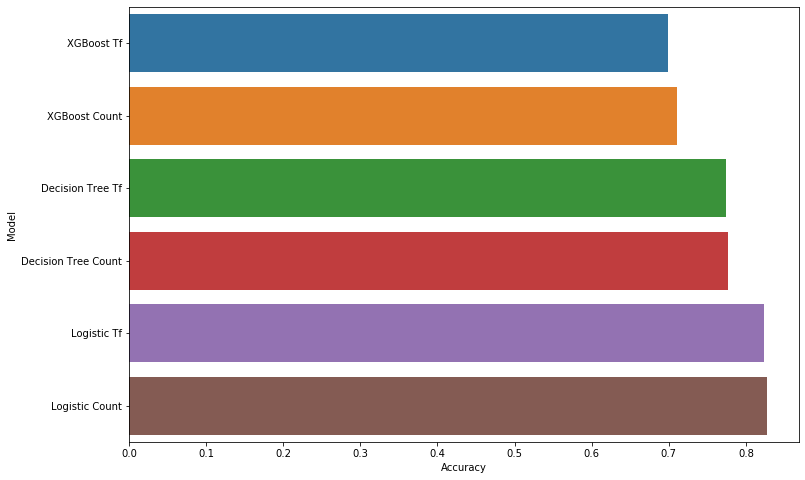

In [65]:
compare = pd.DataFrame({"Model": ["Logistic Count", "Logistic Tf", "XGBoost Count", "XGBoost Tf", "Decision Tree Count","Decision Tree Tf"],
                        "Accuracy": [log_accuracy_count, log_accuracy_tf, xgb_accuracy_count, xgb_accuracy_tf, dsc_accuracy_count,dsc_accuracy_tf]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(12,8))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)